<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<img src="../support_files/images/cropped-SummerWorkshop_Header.png">
</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
    
<center><h2>Table of Contents & Jumplinks</h2></center>
 
<h3>Coding Package Introductions</h3>

* <a href='#matplotlib'>Matplotlib background</a>
* <a href='#imports'>package imports</a>
* <a href='#load_dataset'>create fake datasets</a>
* <a href='#matplotlib_basics'>matplotlib coding basics</a>

    
<h3>Basic Data Visualizations</h3>

* <a href='#bar'>Bar plots</a>
* <a href='#box'>Box plots</a>
* <a href='#scatter'>Scatter plots</a>
* <a href='#timeseries'>Line/timeseries plots</a>
* <a href="#histogram">Histograms</a>
* <a href='#image'>image data</a>   
* <a href='#multiplots'>multiple plots per figure</a>

</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<center><h1>Introduction to Matplotlib</h1></center>

    
<img src="../support_files/images/data_viz/matplotlib_logo.png" width='600'/>  

<p>
    <b>matplotlib</b> is a plotting library for Python.
<p>
<h3>Pros:</h3>
<ul> 
<li>Huge amount of functionality/options.
<li>Works with numpy arrays and python lists.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples (with code) at the <a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a>
<li>Shares many syntactic conventions with Matlab.
</ul>

<p>
<h3>Cons:</h3>
<ul>
<li>Slow for rapidly updating plots.
<li>3D plotting support is not great.
<li>Documentation is not always useful.
<li>Essentially has two interfaces.  One is intended to be close to Matlab, the other is object oriented.  You will find examples that assume one or the other, but rarely the one you are after.
<li>Shares many syntactic conventions with Matlab.
</ul>


<p>
<h3>Resources:</h3>
<ul>
<li><a href="https://matplotlib.org/cheatsheets/">cheat sheets</a>
<li><a href="https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_">youtube tutorials</a>
</ul>

<a id="imports"></a>
</div>

In [1]:
# Import numpy and pyplot 
import matplotlib.pyplot as plt
import numpy as np

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h3> Creating Fake Data </h3>
<a id="load_dataset"></a>

The first thing we need to create some fake data so we have something to plot!  Lets create fake:
    
* timeseries data (times and values)
* Categorical and Numeric data (categories and values)

</div>

In [2]:
# timeseries
times = np.arange(0, 10, 0.01)  # make evenly spaced points between 0 and 10 at intervals of 0.01

# lets give ourselves a few different 'signals' to plot
sin_values = np.sin(times)
cos_values = np.cos(times)
osc_values = np.sin(2 * np.pi * times) * np.exp(-0.5 * times)  # some function of x

In [3]:
# categorical data

# Adoptable cats!
# categories
cat_ids = np.array([0, 1, 2, 3, 4, 5, 6])
cat_names = ['Ace', 'Bonsi', 'Comet', 'Dazzler', 'Espresso', 'Frank', 'Gertrude']

# some values per cat
adopt_apps = np.array([3, 2, 7, 13, 5, 4, 10])
age_years = np.array([3, 5, 1, 9, 5, 2, 8])

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h2> Matplotlib Basics </h2>
<a id="matplotlib_basics"></a>
    
We will be using pyplot.subplots (<code>plt.subplots()</code>) to create our beautiful data visualizations. Calling 
<code>plt.subplots()</code> gives back two objecs that are conventionally called a "figure" and an "axes". To represent these we will create two variables, **fig** and **ax**. 
    
**fig:** You can think of the figure as the frame of your plot. 
* You can resize, reshape the frame but you cannot draw on it. 
* On a single notebook or a script, you can have multiple figures. 
* Each figure can have multiple subplots.
       
**ax:** an axes is your metaphorical canvas to draw on. Or rephrasing, it is the blank sheet you can plot and hold your data. 
* An axes object can only belong to one figure. 
<img src="../support_files/images/data_viz/figure_1axes.png" />   
    
    
<img src="../support_files/images/data_viz/3axesFigure.png" /> 
</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h3> Matplotlib  Code Basics </h3>
    
* create a figure: <code>fig, ax = plt.subplots()</code>
    * Adjust figure size: <code>fig, ax = plt.subplots(figsize = (horizontal, vertical))</code>
    * Multiple plots per figure: <code>fig, ax = plt.subplots(n_rows, n_columns)</code>
        * Note!: we will cover this more in-depth later!

* add title: <code>ax.set_title('plot title')</code>
* set x label: <code>ax.set_xlabel('x label')</code>
* set y label: <code>ax.set_ylabel('y label')</code>
    
NOTE: Later (tomorrow) you will learn Seaborn, which is another plotting package. Seaborn is essentially a wrapper for matplotlib there are many matplotlib conventions and functions that we will use on almost all of our plots regardless of whether they are seaborn or matplotlib plots

</div>

Text(0, 0.5, 'y axis')

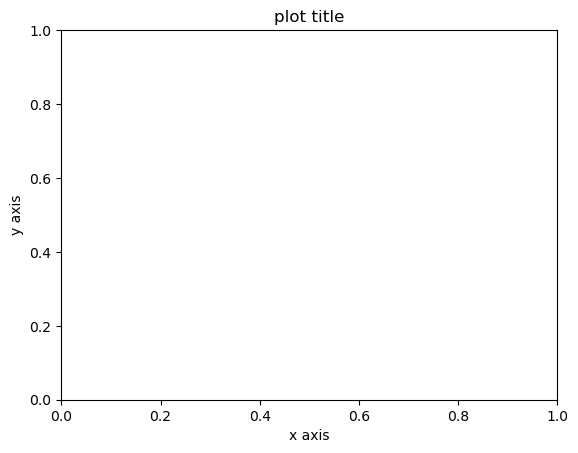

In [4]:
# Lets practice by creating a blank plot! 

fig, ax = plt.subplots()
ax.set_title('plot title')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h3> Bells and Whistles </h3>

    
The Axes object (ax) that we created above provides many methods to help us annotate our plots:

Tick Marks:

* <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html">ax.set_xticks</a>

* <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html">ax.set_xticklabels</a>

Error Bars and Confidence Intervals

* <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html">ax.errorbar()</a>
    
Many more otions are available here -- you can customize the the border, axis ticks, tick labels, line styles, fonts, spacing, etc. The <a href="https://matplotlib.org/stable/api/axes_api.html">documentation</a> and examples available online are good, so usually a google search will get you answers quickly.

</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>Bar Plots</h3>
<a id="bar"></a>

[.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) will create a basic bar plot that you will have to add titles and axes labels to.

**Basic code:**
```
fig, ax = plt.subplots()

ax.bar(x values, y values)

# for bar charts, we often want to customize the x axis ticks and labels
ax.set_xticks(x values)
ax.set_xticklabels( x labels);

# set axis labels
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
```    

</div>

Text(0, 0.5, 'Num Adoption Applications')

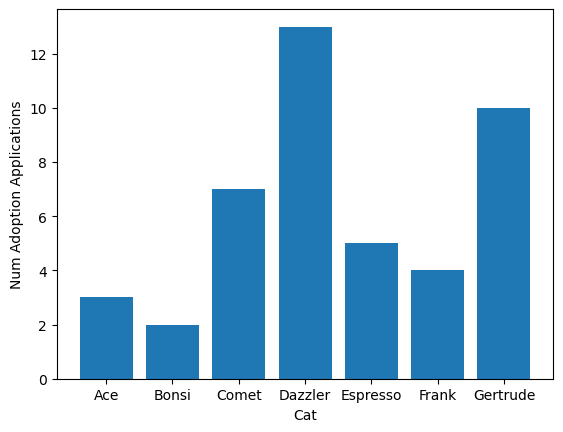

In [5]:
#Lets make a bar plot! 

# we will use our fake categorical data for bar plots

fig, ax = plt.subplots()

ax.bar(cat_ids, adopt_apps)


# for bar charts, we often want to customize the x axis ticks and labels
ax.set_xticks(cat_ids)
ax.set_xticklabels(cat_names);

# set axis labels
ax.set_xlabel('Cat')
ax.set_ylabel('Num Adoption Applications')

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>Box Plots</h3>
<a id="box"></a>

[.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) will create a basic boxplot that you will have to add titles and axes labels to.

**Basic code:**
* vertical: <code>plt.boxplot(values of interest)</code>
* horizontal: <code>plt.boxplot(values of interest, vert=False )</code>

</div>

Text(0.5, 0, 'All Cats')

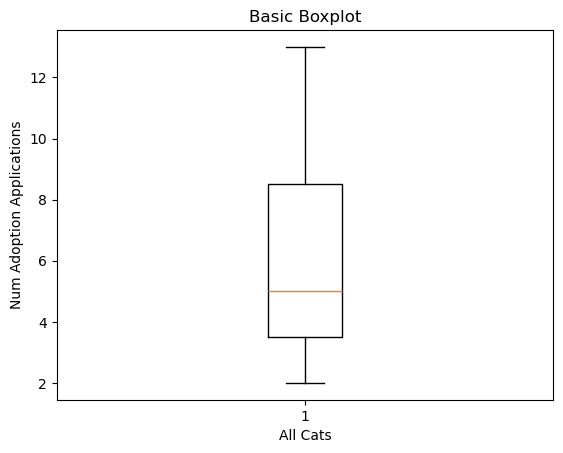

In [6]:
# Lets plot the distribution adoption applications for our sweet little cats using a boxplot
# using a boxplot! 

fig, ax = plt.subplots()
ax.boxplot(adopt_apps)
ax.set_title('Basic Boxplot')

# axis labels
ax.set_ylabel('Num Adoption Applications')
ax.set_xlabel('All Cats')


<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>Scatter Plots</h3>
<a id="scatter"></a>

Matplotlib has a built in scatter plot function:**<code>[.scatter()]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)</code>**

**Basic code**

```
ax.scatter(x = x values,
           y = y values)
```

</div>

Text(0, 0.5, 'num applications')

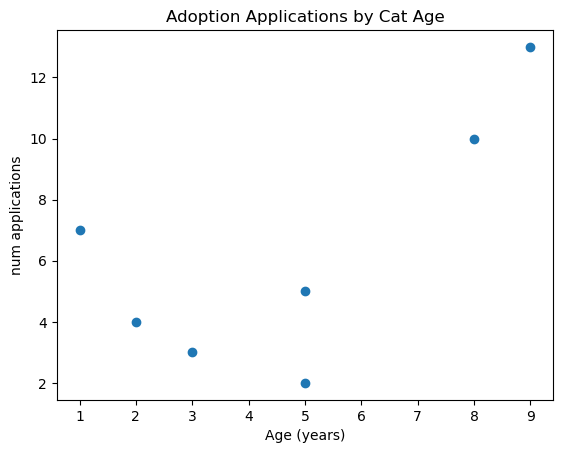

In [7]:
# Now lets plot age vs number of applications
fig, ax = plt.subplots()

ax.scatter(x = age_years,
           y = adopt_apps)

ax.set_title('Adoption Applications by Cat Age')
ax.set_xlabel('Age (years)')
ax.set_ylabel('num applications')

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>Lineplots</h3>
<a id="timeseries"></a>
    
**<code>[.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)</code>** offers very basic line plotting 

**Basic code:**
<code>plt.plot(x, y)</code>
    
**Bells and Whistles**   
```
fig, ax = plt.subplots()

# plot multiple lines
# specify line color, line thickness and give a label for each line (will be displayed in the legend)

ax.plot(x, y1, color='red', linewidth=.5, label='label text') # line 1
ax.plot(x, y2, color='blue', linewidth=2, label='label text') # line 2

    
# Add a title at the top of the plot
ax.set_title('title here')

# Add x/y axis labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')
    
# set the viewable window of the x or y axis
# ax.set_xlim(lower limit, upper limit)
# ax.set_ylim(lower limit, upper limit)

# Add a legend to plot the line labels assigned above!
ax.legend();
```

</div>

<div class="exercise" style="background: #DFF0D8; border-radius: 3px; padding: 10px; color: #000;">
<p><b>Exercise 1.1</b>

Make a simple lineplot of the of `osc_values` by `times`
* set the title to "A Damped Oscillator"
* set the x and y axis to 'Time (s)' and 'Amplitude'

</div>

Text(0, 0.5, 'Amplitude')

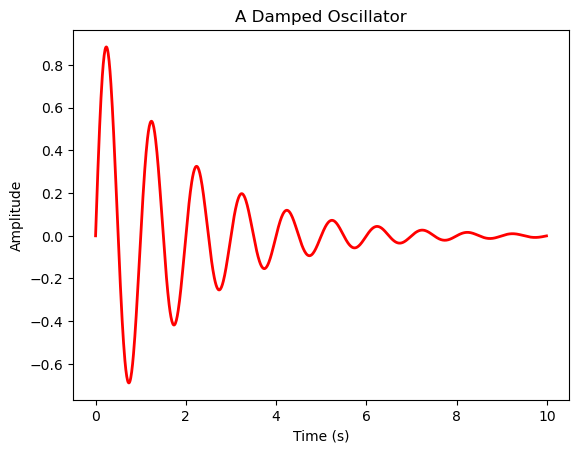

In [8]:
# SOLUTION 1

fig, ax = plt.subplots()

# Plot our data!
ax.plot(times, osc_values, color='red', linewidth=2);

# Add a title at the top of the plot
ax.set_title('A Damped Oscillator')

# Add x/y axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')


<div class="exercise" style="background: #DFF0D8; border-radius: 3px; padding: 10px; color: #000;">
<b>Exercise 1.2</b>

Make a lineplot that includes the `sin_values` and `cos_values` by `times`. 
* make sin to red and give 'sin' as label name
* make cos blue and give 'cos' as label name
* add same x,y axis labels as above

</div>

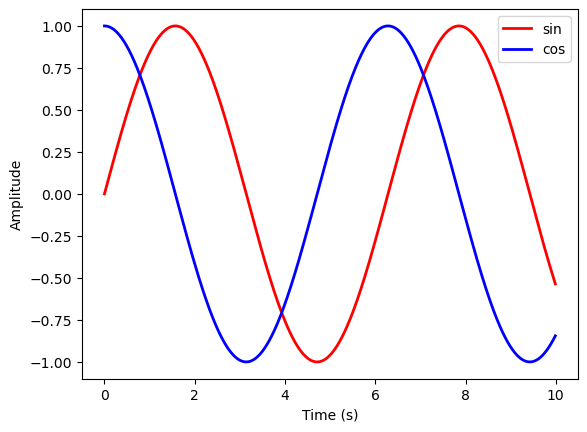

In [9]:
# SOLUTION 2
fig, ax = plt.subplots()

ax.plot(times, sin_values, color='red', linewidth=2, label='sin')
ax.plot(times, cos_values, color='blue', linewidth=2, label='cos')

# Add x/y axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

# Add a legend. Note the `label` argument to ax.plot!
ax.legend();

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>Histograms</h3>
<a id="histogram"></a>
    
histograms are relatively simple with matplotlib using **[.hist]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)**
    
**frequency:** 
    <code>plt.hist(values of interest, bins = int)</code>

**density:**
    <code>plt.hist(values of interest, bins = int, density = True)</code>
    
</div>

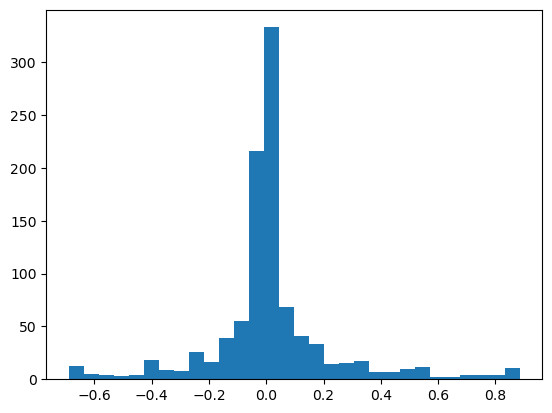

In [10]:
# Lets practice making a histogram with the oscillation values

fig, ax = plt.subplots()
ax.hist(osc_values, bins=30);

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h2> Image Data</h2>
<a id="image"></a>
 
Any time we have a 2D array of values, it may be useful to visualize the array as an image. Matplotlib gives us many options to control how data values are converted to image pixel colors.
​
This process is very simple with matplotlib, just use [.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    
<img src="../support_files/images/data_viz/image_data.png" width="300"/> 

<p><b>Basic code:</b> <code>ax.imshow(2d_image_array_data)</code>
​
<p><b>Helpful Parameters</b>
<ul>
<li> <code>cmap= string</code>: The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data. Default: 'viridis'  For more colormaps check out the <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">colormap documentation</a>)
<li> <code>clim =(min,max)</code>: Set the color limits of the current image. If either vmin or vmax is None, the image min/max respectively will be used for color scaling.
</ul>
</div>

In [11]:
# First, make an interesting 2D array of values

x = np.linspace(-10, 10, 100)
y = np.linspace(-5, 5, 50)
r = (y[:, None]**2 + x[None, :]**2)**0.5
data = np.sin(r) / r + np.random.normal(size=(50, 100), scale=0.1)

print("Array shape:", data.shape)

Array shape: (50, 100)


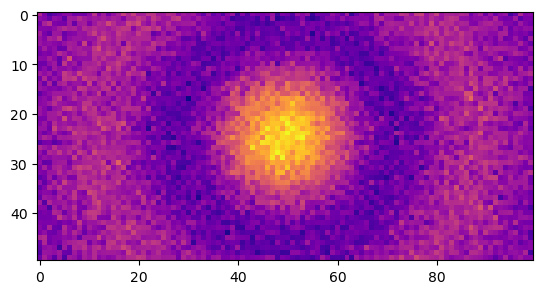

In [12]:
# show as an image

fig, ax = plt.subplots()
ax.imshow(data, cmap='plasma');

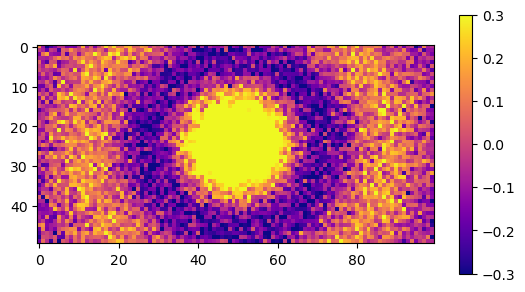

In [13]:
fig, ax = plt.subplots()
image = ax.imshow(data, cmap='plasma', clim=(-0.3, 0.3))

# Add a colorbar using the previously-returned image object (which carries information about the colormap and limits)
fig.colorbar(image, ax=ax, shrink=0.7);

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">
<h2> Multi Plot Figures</h2>
<a id="multiplots"></a>
 
**Figures with Subplots**

A given figure can have more than one axis. The subplot command, which we used above, generates a single axis by default. But we can specify the number of axes that we want..
    
<img src="../support_files/images/data_viz/viz_subplots.png" width="500"/> 

    
**Complex Figures with Gridspec**

[Gridspec](http://matplotlib.org/users/gridspec.html) is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use <code>ax.subplots()</code> (like in the previous examples) if possible.  
 
<img src="../support_files/images/data_viz/viz_gridspec.png" width="500"/> 

</div>

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

**Subplot**

[.subplots]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html): creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

General code example: 

```
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot()
axes[1].plot()
```
    
Optional Parameters for subplots call:
* <code> sharex/sharey = bool </code> forces plots to display the same range along the x-axis  or y-axis depending upon which argument you call. Default = False

</div>

Text(0.5, 0, 'All Cats')

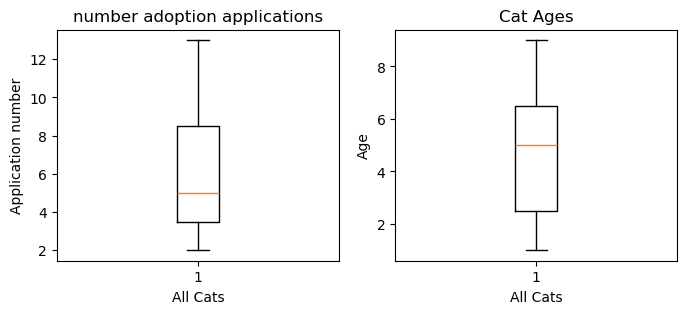

In [14]:
# Lets create 2 basic boxplots of number of applications and cat age and put them
# in the same figure: 

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,3))

axes[0].boxplot(adopt_apps)
axes[0].set_title('number adoption applications')
axes[0].set_ylabel('Application number')
axes[0].set_xlabel('All Cats')


axes[1].boxplot(age_years)
axes[1].set_title('Cat Ages')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('All Cats')

<div class="default" style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; color: #000;">

<h3>gridspec: matplotlib</h3>

**[.subplots]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)**: creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

**General code example:** `

```
fig = plt.figure()
gridspec_fig = fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width
    
ax0.plot()
ax1.plot()
ax2.plot()
```
    
**helpful parameters:**
* <code> sharex/sharey = bool </code> forces plots to display the same range along the x-axis  or y-axis depending upon which parameter you call. Default = False

</div>

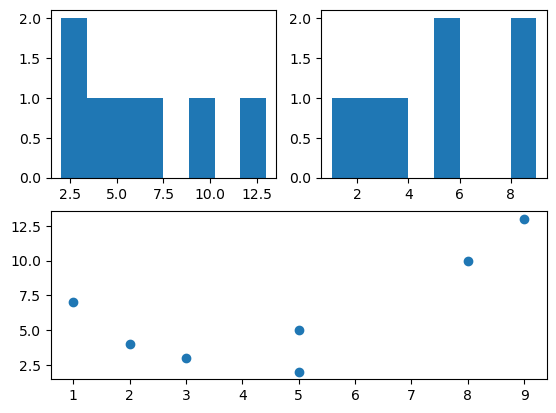

In [15]:
# We just need to add the ax = axes[int] parameter

# Lets make 2 distribution plots of age and applications and 
# a scatter plot of number of applications by age

fig = plt.figure()
gs= fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width

ax0.hist(adopt_apps, bins=8)

ax1.hist(age_years, bins=8)

ax2.scatter(x = age_years, y = adopt_apps)